# Goal of this file:
# save ARIMA model. Find the difference between forecast and prediction

In [14]:
import pandas as pd
from pandas import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt
%matplotlib inline
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [55]:
# univariate_data=test_new.loc[500:24999,['dateTime','AEDAHO_T9_V2']]
univariate_data=test_new.loc[500:20000,['dateTime','AEDAHO_T9_V2']]
univariate_data = univariate_data.set_index('dateTime')

shape of univariate_data:  (19501, 1)


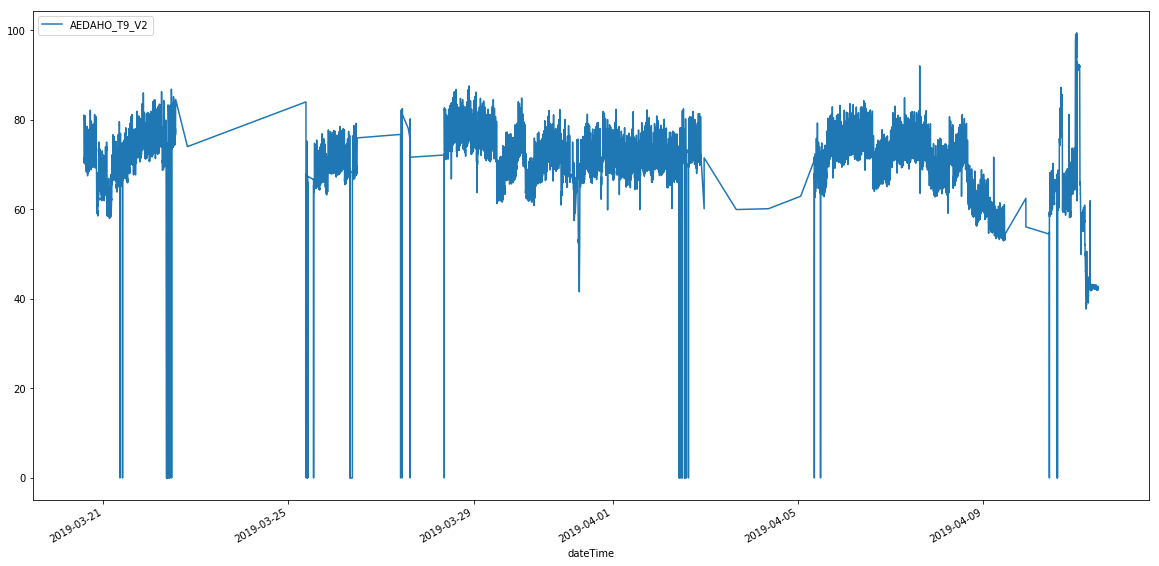

In [57]:
from matplotlib.pylab import rcParams
print('shape of univariate_data: ',univariate_data.shape)
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

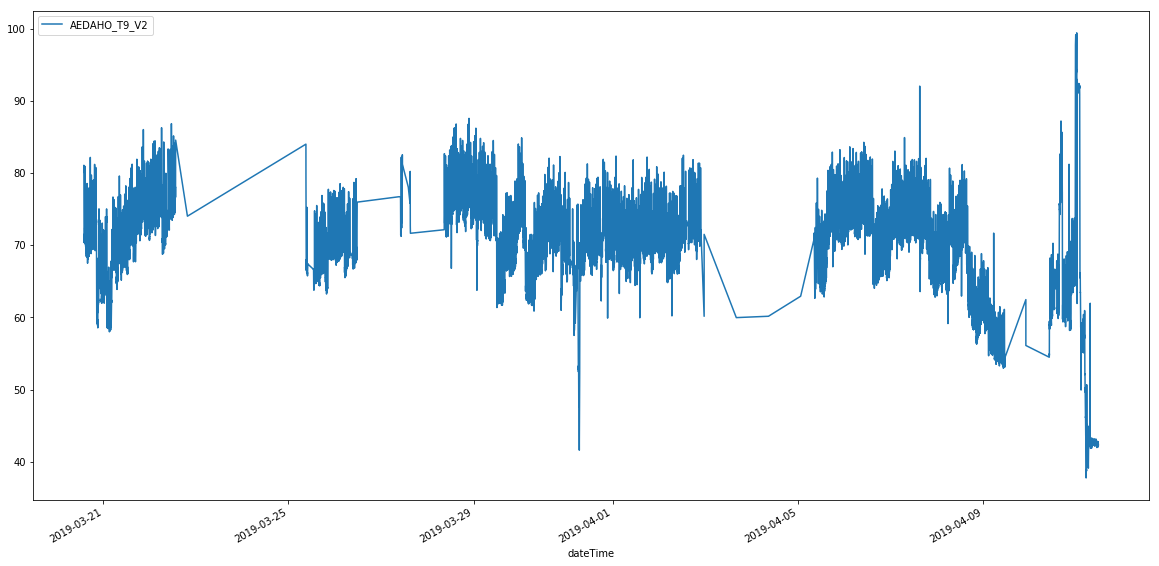

In [58]:
from numpy import nan
univariate_data_drop_zero= univariate_data.replace(0,nan)
univariate_data_drop_zero= univariate_data_drop_zero.dropna(how='any',axis=0)

univariate_data_drop_zero.plot()
plt.show()

In [59]:
dataset=univariate_data_drop_zero.values
print(type(dataset))
# print(dataset)
print('length of dataset: ',len(dataset))

<class 'numpy.ndarray'>
length of dataset:  19433


In [60]:
NumberOfElements=int(len(dataset)*0.8)
print(NumberOfElements)

15546


In [61]:
train_set=dataset[0:NumberOfElements]
test_set=dataset[NumberOfElements:len(dataset)]

In [62]:
Actual = [x for x in train_set]
Predictions = list()

In [81]:
model = ARIMA(Actual, order=(7,0,0))
model_fit = model.fit(disp=0)

# save model
model_fit.save('model_22_may.pkl')
# load model
loaded = ARIMAResults.load('model_22_may.pkl')

In [82]:
start_index = len(Actual)
end_index = start_index + len(test_set)-1
# forecast = model_fit.predict(start=start_index, end=end_index)
forecast = loaded.predict(start=start_index, end=end_index)

In [83]:
print(forecast)
print(forecast.size)

[68.77878947 69.83297361 69.93602667 ... 68.80497983 68.80497983
 68.80497983]
3887


In [84]:
print(test_set.size)
print(test_set)

3887
[[68.86973013]
 [69.0363855 ]
 [69.20894264]
 ...
 [81.08975577]
 [80.65553691]
 [80.1202728 ]]


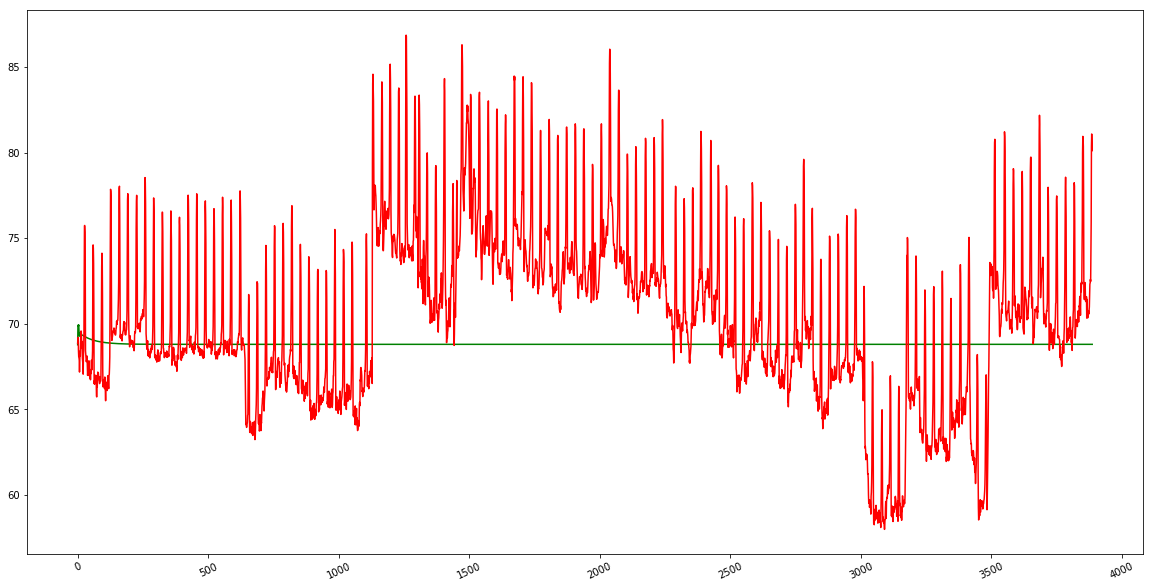

In [85]:
plt.plot(forecast,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)
plt.show()

In [86]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, forecast)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

# print("size of prediction: ",len(Predictions))
# print("size of actual: ",len(Actual))

Test Mean Squared Error (smaller the better fit): 26.817
